In [1]:
import numpy as np
import os
import pandas as pd
import yfinance as yf
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

from model import fetchStockData, buildLookbackData, buildTensorData, buildRNN, plotPrediction, plotPredictionTest

tf.random.set_seed(13)

In [2]:
df = fetchStockData('EC=F', '2017-01-01', '2020-03-31')

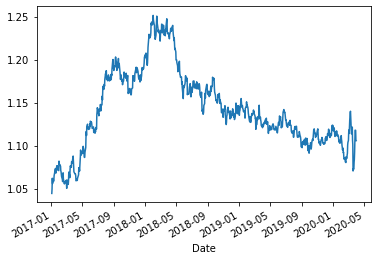

In [3]:
# Plot daily prices of Bitcoin
df['Close'].plot()

In [4]:
df[df['Volume'].isnull()]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [5]:
# Use 80% for training data
TRAIN_SPLIT = int(len(df) * 0.8)

# n day lookback
LOOKBACK = 45
# n day prediction
TARGET = 12
# n value batch
BATCH_SIZE = 25

# buffer - for shuffling, so memory doesnt overflow
BUFFER_SIZE = 10000

# For training
EVALS = 200
EPOCHS = 10

In [6]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
# Scale data
# Scale the data
df_features = df[['Close', 'Volume']]
scaled = (df_features-df_features.mean())/df_features.std()
scaled_values = scaled.values

# For later re-conversion
MEAN = df_features.mean()['Close']
STD = df_features.std()['Close']
MEAN_V = df_features.mean()['Volume']
STD_V = df_features.std()['Volume']

### Split Train and Test Data

In [8]:
x_train, y_train = buildLookbackData(scaled_values, 
                                     target = scaled_values[:, 0], 
                                     start_index = 0,
                                     end_index = TRAIN_SPLIT, 
                                     lookback = LOOKBACK,
                                     target_size = TARGET)

x_test, y_test = buildLookbackData(scaled_values, 
                                   target = scaled_values[:, 0],
                                   start_index = TRAIN_SPLIT, 
                                   end_index = None, 
                                   lookback = LOOKBACK,
                                   target_size = TARGET)

### Put Data Into Tensors

In [9]:
train_data, test_data = buildTensorData(x_train, y_train, x_test, y_test, BATCH_SIZE, BUFFER_SIZE)

### Build Model

In [10]:
model = buildRNN((LOOKBACK, 2), 200, 14, TARGET)

### Train Model

In [11]:
training_history = model.fit(train_data, 
                             epochs = EPOCHS,
                             steps_per_epoch = EVALS,
                             validation_data = test_data,
                             validation_steps = 50)

Epoch 1/10
200/200 [==============================] - 22s 112ms/step - loss: 0.3809 - val_loss: 0.2924
Epoch 2/10
200/200 [==============================] - 22s 111ms/step - loss: 0.2150 - val_loss: 0.2554
Epoch 3/10
200/200 [==============================] - 22s 112ms/step - loss: 0.1935 - val_loss: 0.2588
Epoch 4/10
200/200 [==============================] - 22s 112ms/step - loss: 0.1768 - val_loss: 0.2617
Epoch 5/10
200/200 [==============================] - 23s 113ms/step - loss: 0.1593 - val_loss: 0.3018
Epoch 6/10
200/200 [==============================] - 23s 113ms/step - loss: 0.1445 - val_loss: 0.3768
Epoch 7/10
200/200 [==============================] - 23s 113ms/step - loss: 0.1333 - val_loss: 0.3881
Epoch 8/10
200/200 [==============================] - 23s 113ms/step - loss: 0.1219 - val_loss: 0.3954
Epoch 9/10
200/200 [==============================] - 22s 110ms/step - loss: 0.1132 - val_loss: 0.4621
Epoch 10/10
200/200 [==============================] - 16s 81ms/step - lo

### Allow an arbitrary period of data

In [12]:
# Add in new data, not part of training/testing
df_new = fetchStockData('EC=F', '2020-04-01', '2020-05-11')[['Close', 'Volume']]
scaled_new = df_new.copy()
scaled_new['Close'] = (df_new['Close'] - MEAN) / STD
scaled_new['Volume'] = (df_new['Volume'] - MEAN_V) / STD_V

df_new = pd.concat([df[['Close', 'Volume']], df_new])
scaled_new = pd.concat([scaled, scaled_new])

<Figure size 432x288 with 0 Axes>

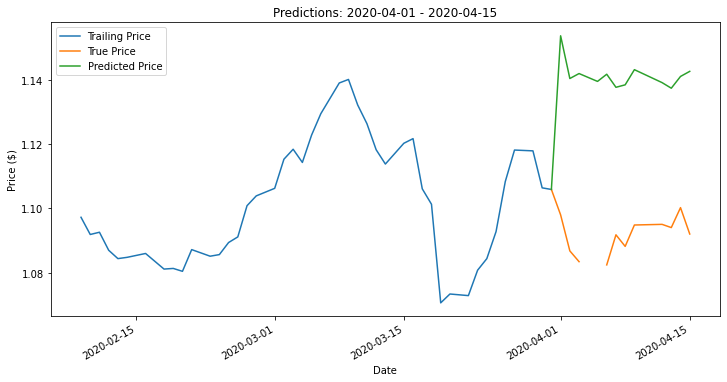

<Figure size 432x288 with 0 Axes>

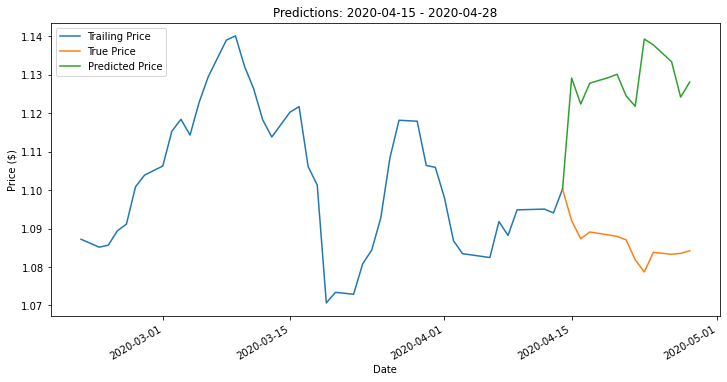

<Figure size 432x288 with 0 Axes>

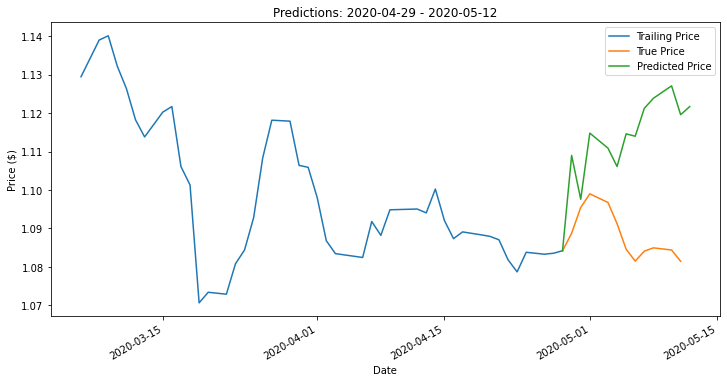

<Figure size 432x288 with 0 Axes>

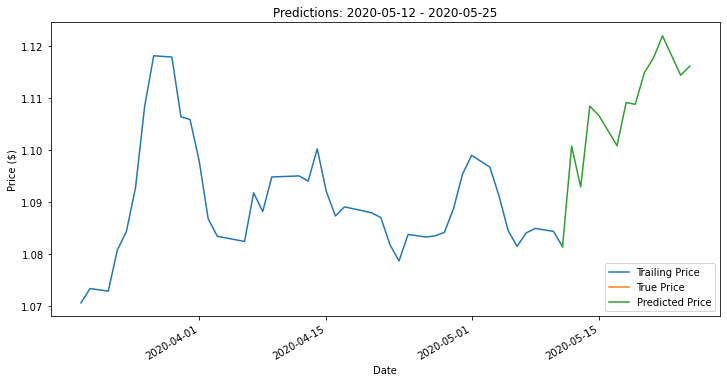

In [13]:
joined, predicted = plotPrediction(model, df_new, scaled_new, np.datetime64('2020-04-01'), 
                                   LOOKBACK, TARGET, MEAN, STD, instrument='Future')

joined, predicted = plotPrediction(model, df_new, scaled_new, np.datetime64('2020-04-15'), 
                                   LOOKBACK, TARGET, MEAN, STD, instrument='Future')

joined, predicted = plotPrediction(model, df_new, scaled_new, np.datetime64('2020-04-29'), 
                                   LOOKBACK, TARGET, MEAN, STD, instrument='Future')

joined, predicted = plotPrediction(model, df_new, scaled_new, np.datetime64('2020-05-12'), 
                                   LOOKBACK, TARGET, MEAN, STD, instrument='Future')